In [1]:
messages = [line.rstrip() for line in open('smsspamcollection/SMSSpamCollection')]

In [2]:
len(messages)

5574

In [3]:
for messno, msg in enumerate(messages[:20]):
    print(messno, msg)
    print('\n')

0 ham	Go until jurong point, crazy.. Available only in bugis n great world la e buffet... Cine there got amore wat...


1 ham	Ok lar... Joking wif u oni...


2 spam	Free entry in 2 a wkly comp to win FA Cup final tkts 21st May 2005. Text FA to 87121 to receive entry question(std txt rate)T&C's apply 08452810075over18's


3 ham	U dun say so early hor... U c already then say...


4 ham	Nah I don't think he goes to usf, he lives around here though


5 spam	FreeMsg Hey there darling it's been 3 week's now and no word back! I'd like some fun you up for it still? Tb ok! XxX std chgs to send, Â£1.50 to rcv


6 ham	Even my brother is not like to speak with me. They treat me like aids patent.


7 ham	As per your request 'Melle Melle (Oru Minnaminunginte Nurungu Vettam)' has been set as your callertune for all Callers. Press *9 to copy your friends Callertune


8 spam	WINNER!! As a valued network customer you have been selected to receivea Â£900 prize reward! To claim call 09061701461. Claim cod

In [4]:
# Organize messages into dataframes using pandas

In [5]:
import pandas as pd

messages = pd.read_csv('smsspamcollection/SMSSpamCollection', sep='\t', names = ['label', 'message'])

messages.head()

,label,message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [6]:
messages.describe()

,label,message
count,5572,5572
unique,2,5169
top,ham,"Sorry, I'll call later"
freq,4825,30


In [7]:
messages.groupby('label').describe()

message                                                               
        count unique                                                top freq
label                                                                       
ham      4825   4516                             Sorry, I'll call later   30
spam      747    653  Please call our customer service representativ...    4

In [8]:
# add a new feature called length that stores length of the message

In [9]:
messages['length'] = messages['message'].apply(len)

messages.head(6)

,label,message,length
0,ham,"Go until jurong point, crazy.. Available only ...",111
1,ham,Ok lar... Joking wif u oni...,29
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,155
3,ham,U dun say so early hor... U c already then say...,49
4,ham,"Nah I don't think he goes to usf, he lives aro...",61
5,spam,FreeMsg Hey there darling it's been 3 week's n...,147


In [10]:
# distribution of message length

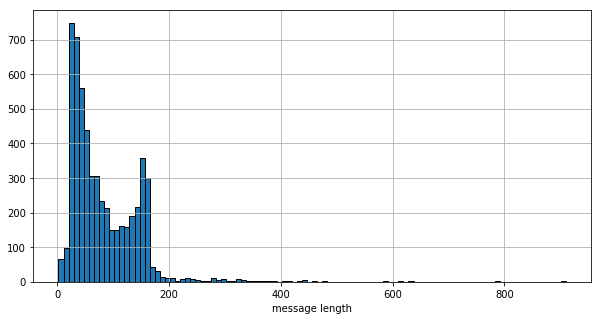

In [11]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

plt.xlabel('message length')
messages['length'].hist(bins=100, edgecolor='black', figsize=(10,5))
plt.savefig('output/Histogram1.png')

In [12]:
# plot separate histograms for spam and ham to analyze the difference in distribution

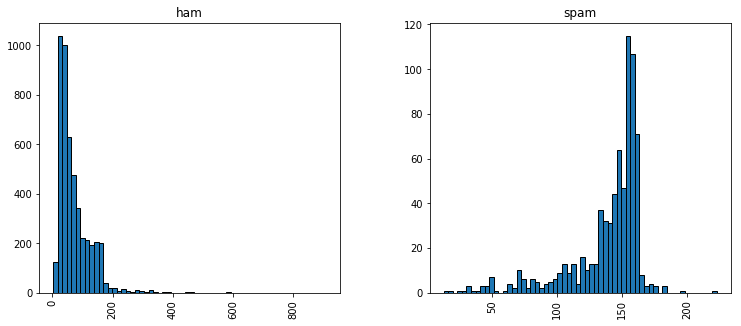

In [13]:
messages.hist(column='length',by='label',bins=60,figsize=(12,5),
              edgecolor='black')
plt.savefig('output/Histogram2.png')

In [14]:
# text pre-processing

In [15]:
def text_process(data):
    '''
    1. remove punc
    2. remove stop words
    3. return list of clean text words
    '''
    
    nopunc = [c for c in data if c not in string.punctuation] #remove punctuations
    nopunc = ''.join(nopunc)
    
    #nltk.download('stopwords')
    clean_msgs = [word for word in nopunc.split() if word.lower() not in stopwords.words('english')] # remove stopwords
    
    return clean_msgs

In [16]:
# File:        text_preprocess.py
#
# Author:      Rohan Patel
#
# Date:        05/09/2018
#
# Description: This script loads the sms spam data, organizes the data into a pandas dataframe, adds a new 
#              feature (length of message) to the data, applies some basic text pre-processing techniques 
#              like stopword removal and punctuation removal, and converts the messages into a list of processed 
#              tokens. Finally, the processed dataframe is copied into a new csv file processed_msgs.csv

import pandas as pd
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
import string
nltk.download('stopwords')

def loadData():
    
    messages = pd.read_csv('smsspamcollection/SMSSpamCollection', sep='\t', names = ['label', 'message'])
    messages['length'] = messages['message'].apply(len)
    
    return messages

def text_process(data):
    '''
    1. remove punc
    2. remove stop words
    3. return list of clean text words
    '''
    
    nopunc = [c for c in data if c not in string.punctuation] #remove punctuations
    nopunc = ''.join(nopunc)
    
    clean_msgs = [word for word in nopunc.split() if word.lower() not in stopwords.words('english')] # remove stopwords
    
    return clean_msgs

def main():
    
    messages = loadData()
    #print(messages)
    messages['processed_msg'] = messages['message'].apply(text_process)
    
    print('\n################################################## Processed Messages ##################################################\n')
    with pd.option_context('expand_frame_repr', False):
        print (messages)
    #print(messages)

    messages.to_csv('output/processed_msgs.csv', encoding='utf-8', index=False) #copy processed messages dataframe to a new csv file

if __name__ == "__main__":
    main()

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Rohan\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!

################################################## Processed Messages ##################################################

     label                                            message  length                                      processed_msg
0      ham  Go until jurong point, crazy.. Available only ...     111  [Go, jurong, point, crazy, Available, bugis, n...
1      ham                      Ok lar... Joking wif u oni...      29                     [Ok, lar, Joking, wif, u, oni]
2     spam  Free entry in 2 a wkly comp to win FA Cup fina...     155  [Free, entry, 2, wkly, comp, win, FA, Cup, fin...
3      ham  U dun say so early hor... U c already then say...      49      [U, dun, say, early, hor, U, c, already, say]
4      ham  Nah I don't think he goes to usf, he lives aro...      61  [Nah, dont, think, goes, usf, lives, arou

In [17]:
# Vectorization of processed messages

In [26]:
# File:        text_classification.py
#
# Author:      Rohan Patel
#
# Date:        05/10/2018
#
# Description:

import pandas as pd
import pickle
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report

def Tfidf_Vectorization(messages):
    '''
    1. Convert word tokens from processed msgs dataframe into a bag of words
    2. Convert bag of words representation into tfidf vectorized representation for each message
    '''
    
    bow_transformer = CountVectorizer(analyzer=text_process).fit(messages['message'])
    bow = bow_transformer.transform(messages['message']) # bag of words

    tfidf_transformer = TfidfTransformer().fit(bow)
    tfidf_vect = tfidf_transformer.transform(bow) # tfidf vector representation
    
    pickle.dump(tfidf_vect, open("output/tfidf_vector.pickle", "wb")) # stores tfidf vector in a pickle file so it could be used later in future scripts
    
    return tfidf_vect

def TrainTestSplit(tfidf_vect, messages):
    '''
    Split dataset into training and test sets. We use a 70/30 split.
    '''
    X_train, X_test, y_train, y_test = train_test_split(tfidf_vect, messages['label'], test_size = 0.3, random_state = 101)
    
    return X_train, X_test, y_train, y_test

def train_classifier(classifier, X_train, y_train):
    classifier.fit(X_train, y_train)
    
def predict_labels(classifier, X_test):
    return (classifier.predict(X_test))

def main():
    
    messages = pd.read_csv('output/processed_msgs.csv')

    tfidf_vect = Tfidf_Vectorization(messages)
    X_train, X_test, y_train, y_test = TrainTestSplit(tfidf_vect, messages)
    
    svm = SVC(kernel = 'sigmoid', gamma = 1.0)
    dtree = DecisionTreeClassifier()
    mnb = MultinomialNB()
    knn = KNeighborsClassifier()
    rfc = RandomForestClassifier()
    ada_boost = AdaBoostClassifier()
    bagging_clf = BaggingClassifier()
    
    classifiers = {'SVM': svm, 'Decision Tree': dtree, 'Multinomial NB': mnb, 'KNN': knn, 'Random Forest': rfc, 
                   'AdaBoost': ada_boost, 'Bagging Classifier': bagging_clf}
    
    pred_scores = []
    for k, v in classifiers.items():
        train_classifier(v, X_train, y_train)
        pred = predict_labels(v, X_test)
        pred_scores.append((k, [accuracy_score(y_test, pred)]))
        print('\n############### ' + k + ' ###############\n')
        print(classification_report(y_test, pred))
        
    accuracy = pd.DataFrame.from_items(pred_scores, orient = 'index', columns = ['Accuracy Rate'])
    print('\n')
    print(accuracy)
    
    '''
    train_classifier(mnb, X_train, y_train)
    pred = predict_labels(mnb, X_test)
    
    print(pred)
    print('\n')
    print('Accuracy Score:', accuracy_score(y_test, pred))
    print('\n')
    print(classification_report(y_test, pred))
    '''
    
if __name__ == "__main__":
    main()


############### SVM ###############

             precision    recall  f1-score   support

        ham       0.97      1.00      0.98      1475
       spam       0.99      0.77      0.87       197

avg / total       0.97      0.97      0.97      1672


############### Decision Tree ###############

             precision    recall  f1-score   support

        ham       0.98      0.99      0.98      1475
       spam       0.92      0.84      0.88       197

avg / total       0.97      0.97      0.97      1672


############### Multinomial NB ###############

             precision    recall  f1-score   support

        ham       0.95      1.00      0.98      1475
       spam       1.00      0.64      0.78       197

avg / total       0.96      0.96      0.95      1672


############### KNN ###############

             precision    recall  f1-score   support

        ham       0.90      1.00      0.95      1475
       spam       1.00      0.21      0.34       197

avg / total       0.9

In [111]:
test_tfidf = pickle.load(open("output/tfidf_vector.pickle", "rb"))